# 12 Expectations 


In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

notebookdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")
datadir = os.path.join(srcdir,"data")
sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datadir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 12.1 Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
# Columns of interest
exp = ['exphappy','expnum', 'match_es', 'dec','dec_o', 'yes_rate']

# Data containing independent and various dependent variables
df_exp = df[exp]
df_male_exp = df_male[exp]
df_female_exp = df_female[exp]

## 12.2 Univariate Analysis


,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
exphappy,8277.0,101,1.0,5.0,5.534131,6.0,7.0,10.0,0.109133,-8.942186,77.962698,0.0,Reject H0


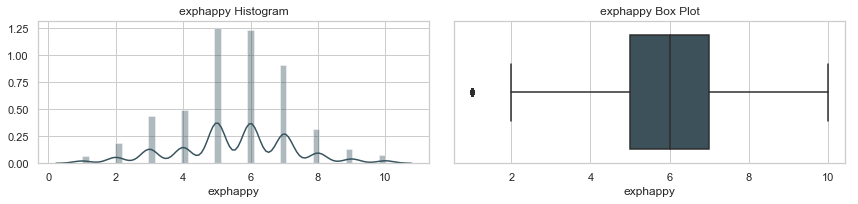

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
expnum,1800.0,6578,0.0,2.0,5.570556,4.0,8.0,20.0,0.410717,1.388555,-0.071916,0.0,Reject H0


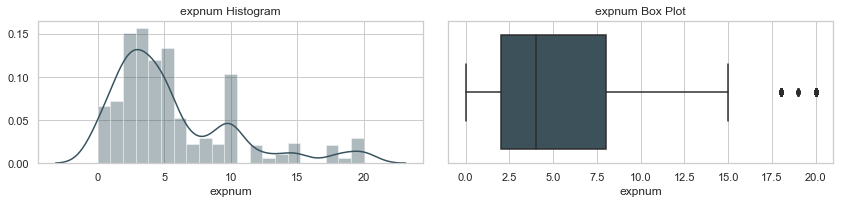

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
match_es,7205.0,1173,0.0,2.0,3.207814,3.0,4.0,18.0,0.346997,-2.074891,2.305174,0.0,Reject H0


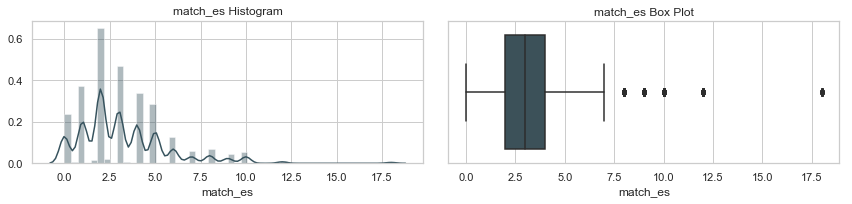

,No,Yes,missing
dec,4860,3518,0


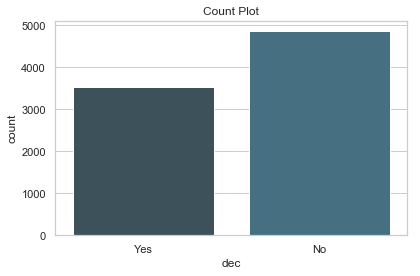

,No,Yes,missing
dec_o,4863,3515,0


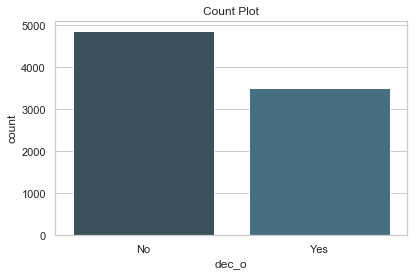

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
yes_rate,8378.0,0,0.0,0.238095,0.419551,0.4,0.6,1.0,0.0,0.0,-3.0,1.0,Fail to Reject H0


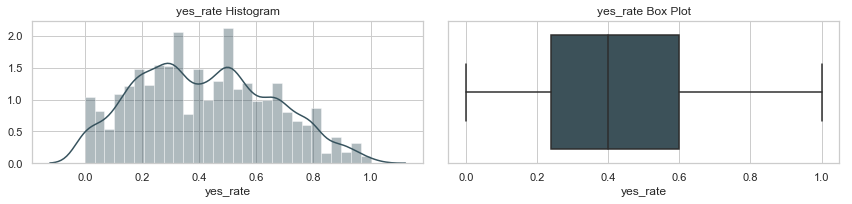

In [3]:
a = univariate.analysis(df_exp)
for a in a:
    a['desc']
    a['plot']



## 12.3 Bivariate Analysis


### 12.3.1 Subject Decision by Expectation of Happiness with the Experience
Subject yes decisions were associated with higher expectation

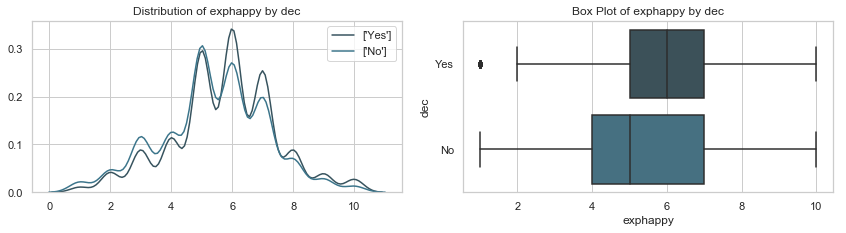

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
exphappy,Reject H0,No,4783.0,77,1.0,4.0,5.393477,5.0,7.0,10.0,0.124870,-7.754546,58.132982,0.0
exphappy,Reject H0,Yes,3494.0,24,1.0,5.0,5.726674,6.0,7.0,10.0,0.082314,-11.982913,141.590202,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exphappy,dec,H-Statistic,72.915376,1.353297e-17,Reject
0,Anova,exphappy,dec,F Statistic,75.214734,5.026390e-18,Reject


In [5]:
i, d, p = bivariate.analysis(x='exphappy', y='dec', df=df)
p
d
i

### 12.3.2 Partner Decision by Expectation of Happiness with the Experience
Partner no decisions were associated with higher expectations on behalf of the subject.

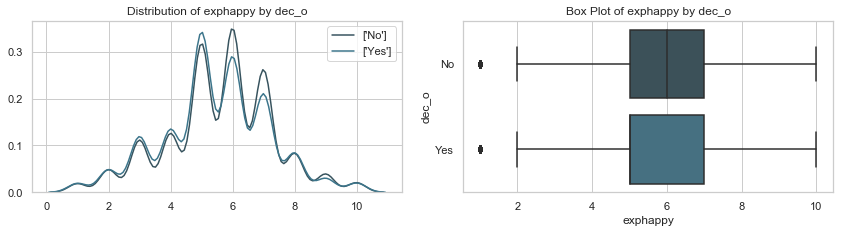

,normality,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
exphappy,Reject H0,No,4815.0,48,1.0,5.0,5.592523,6.0,7.0,10.0,0.098859,-9.915769,96.322469,0.0
exphappy,Reject H0,Yes,3462.0,53,1.0,5.0,5.452917,5.0,7.0,10.0,0.121864,-7.958396,61.336064,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exphappy,dec_o,H-Statistic,18.327152,0.000019,Reject
0,Anova,exphappy,dec_o,F Statistic,13.072652,0.000301,Reject


In [6]:
i, d, p = bivariate.analysis(x='exphappy', y='dec_o', df=df)
p
d
i

### 12.3.3 Subject Decision by Expectation Number of Yesses
Subject yes decisions were associated with higher expectations

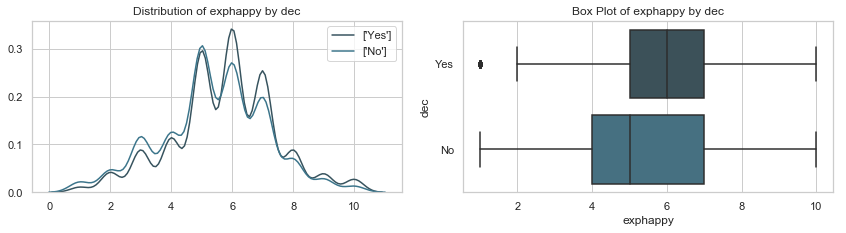

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
exphappy,Reject H0,No,4783.0,77,1.0,4.0,5.393477,5.0,7.0,10.0,0.124870,-7.754546,58.132982,0.0
exphappy,Reject H0,Yes,3494.0,24,1.0,5.0,5.726674,6.0,7.0,10.0,0.082314,-11.982913,141.590202,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exphappy,dec,H-Statistic,72.915376,1.353297e-17,Reject
0,Anova,exphappy,dec,F Statistic,75.214734,5.026390e-18,Reject


In [5]:
i, d, p = bivariate.analysis(x='expnum', y='dec', df=df)
p
d
i

### 12.3.4 Partner Decision by Subject Expected Number of Yesses
Partner yes decisions were associated with higher expectations on behalf of the subject.

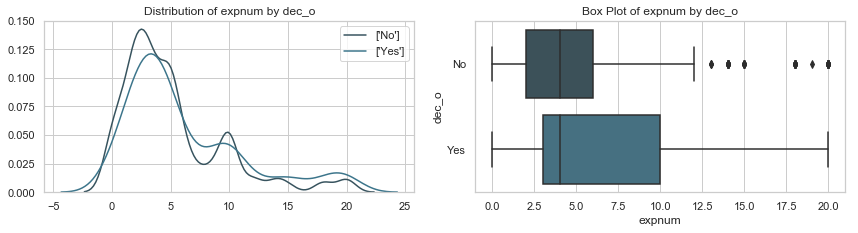

,normality,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
expnum,Reject H0,No,1040.0,3823,0.0,2.0,5.118269,4.0,6.0,20.0,0.410029,1.395707,-0.052001,0.0
expnum,Reject H0,Yes,760.0,2755,0.0,3.0,6.189474,4.0,10.0,20.0,0.411663,1.378718,-0.099138,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,expnum,dec_o,H-Statistic,18.424226,0.000018,Reject
0,Anova,expnum,dec_o,F Statistic,22.479736,0.000002,Reject


In [7]:
i, d, p = bivariate.analysis(x='expnum', y='dec_o', df=df)
p
d
i

### 12.3.5 Subject Decision by Expectation Number of Matches
Significant association of yes decisions and expected number of matches.

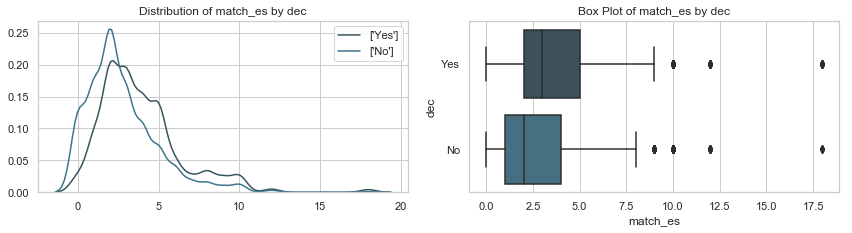

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
match_es,Reject H0,No,4209.0,651,0.0,1.0,2.735020,2.0,4.0,18.0,0.340599,-2.149443,2.620106,0.0
match_es,Reject H0,Yes,2996.0,522,0.0,2.0,3.872029,3.0,5.0,18.0,0.355476,-1.978306,1.913696,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,match_es,dec,H-Statistic,471.931781,1.217309e-104,Reject
0,Anova,match_es,dec,F Statistic,399.489597,1.527350e-86,Reject


In [8]:
i, d, p = bivariate.analysis(x='match_es', y='dec', df=df)
p
d
i

### 12.3.6 Partner Decision by Subject Expected Number of Matches
Slight, yet significant association of yes decisions with higher expectations

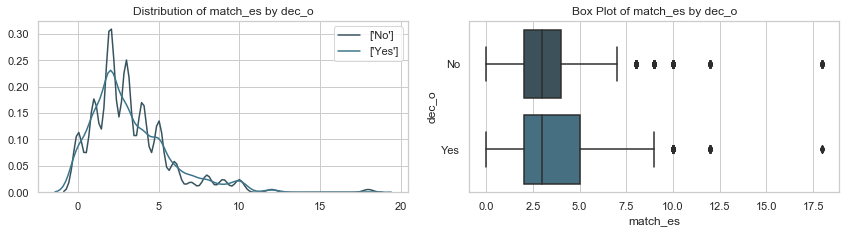

,normality,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
match_es,Reject H0,No,4222.0,641,0.0,2.0,3.202274,3.0,4.0,18.0,0.338286,-2.176788,2.738407,0.0
match_es,Reject H0,Yes,2983.0,532,0.0,2.0,3.215655,3.0,5.0,18.0,0.358391,-1.945633,1.785487,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,match_es,dec_o,H-Statistic,0.065939,0.797344,Fail to Reject
0,Anova,match_es,dec_o,F Statistic,0.052360,0.819012,Fail to Reject


In [9]:
i, d, p = bivariate.analysis(x='match_es', y='dec_o', df=df)
p
d
i

## 12.4 Multivariate Analysis

### 12.4.1 Decision and Expectations of Happiness with Experience, by Gender
Association was significant. For both male and female subjects, higher expectations were associated with yes decisions. 

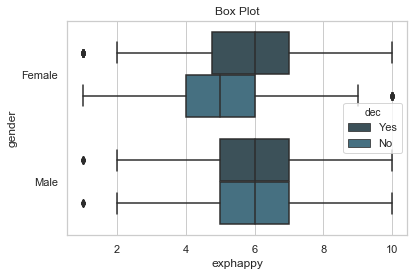

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
exphappy,Female,No,2591.0,64,1.0,4.00,4.988421,5.0,6.0,10.0,0.153377,-6.205568,36.509076,0.0,Reject H0
exphappy,Female,Yes,1512.0,17,1.0,4.75,5.454365,6.0,7.0,10.0,0.104856,-9.324828,84.952420,0.0,Reject H0
exphappy,Male,No,2192.0,13,1.0,5.00,5.872263,6.0,7.0,10.0,0.076557,-12.908188,164.621315,0.0,Reject H0
exphappy,Male,Yes,1982.0,7,1.0,5.00,5.934410,6.0,7.0,10.0,0.059220,-16.767420,279.146389,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,1044.041601,1.0,366.982,4.5257e-80,0.0421128,0.0419932
dec,130.114781,1.0,45.7355,1.44542e-11,0.00524835,0.00513301
gender:dec,81.198163,1.0,28.5412,9.41648e-08,0.00327523,0.00316012
Residuals,23536.210670,8273.0,,,,


In [11]:
i,d,p = trivariate.analysis(x='gender', y='exphappy', z='dec', df=df)
p
d
i

### 12.4.2 Partner Decision and Subject Expectations of Happiness with Experience, by Gender
Association was significant, but less so than subject decisions. For both male and female subjects, yes decisions had a higher mean expectation. The median expectation between yes and no decisions were the same, for both males and females. 

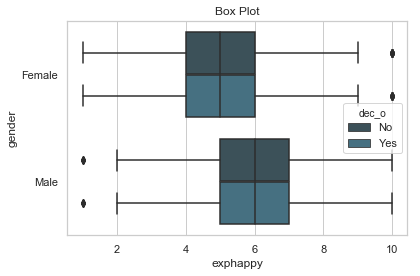

,gender,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
exphappy,Female,No,2156.0,42,1.0,4.0,5.236549,5.0,6.0,10.0,0.136906,-7.025156,47.352814,0.0,Reject H0
exphappy,Female,Yes,1947.0,39,1.0,4.0,5.075501,5.0,6.0,10.0,0.138751,-6.924096,45.943108,0.0,Reject H0
exphappy,Male,No,2659.0,6,1.0,5.0,5.881158,6.0,7.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
exphappy,Male,Yes,1515.0,14,1.0,5.0,5.937954,6.0,7.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,1104.913424,1.0,385.403,6.59659e-84,0.044459,0.0443385
dec_o,6.080664,1.0,2.12099,0.145331,0.000244671,0.000129299
gender:dec_o,23.567949,1.0,8.2207,0.00415197,0.000948315,0.000832862
Residuals,23717.875002,8273.0,,,,


In [12]:
i,d,p = trivariate.analysis(x='gender', y='exphappy', z='dec_o', df=df)
p
d
i